# GenAI-Camp: Day 01
## Lesson: Data Understanding with Matplotlib

This lesson is intended to show you the basics of data understanding using *matplotlib* 

During this lesson you will learn how to ...

- plot data using different types of plots
- enhance these plots with additional information
- create insights visually


### Set up the environment
Import the necessary libraries, set constants, and define helper functions.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import os

In [ ]:
# Check runtime environment to make sure we are running in a colab environment. 
if os.getenv("COLAB_RELEASE_TAG"):
   COLAB = True
   print("Running on COLAB environment.") 
else:
   COLAB = False
   print("WARNING: Running on LOCAL environment.")

In [ ]:
# Define path of ressources
if COLAB:
    # Clone the data repository into colab
    !git clone https://github.com/openknowledge/workshop-genai-camp-data.git
    DATA_PATH = "/content/workshop-genai-camp-data/day-01/data"
else:
    DATA_PATH = "../data"
IMDB_FILE = DATA_PATH + "/imdb_dataset.csv"

### Introduction: [Matplotlib](https://matplotlib.org/stable/)

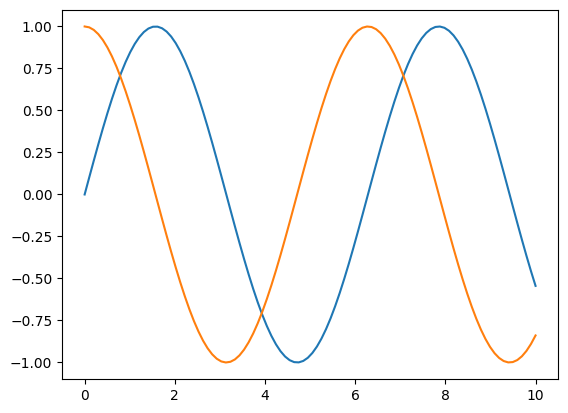

In [4]:
# Create some dummy data with numpy
x = np.linspace(0, 10, 100)

# plot creates a simple line plot
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# call plt.show() to display the plot
plt.show()

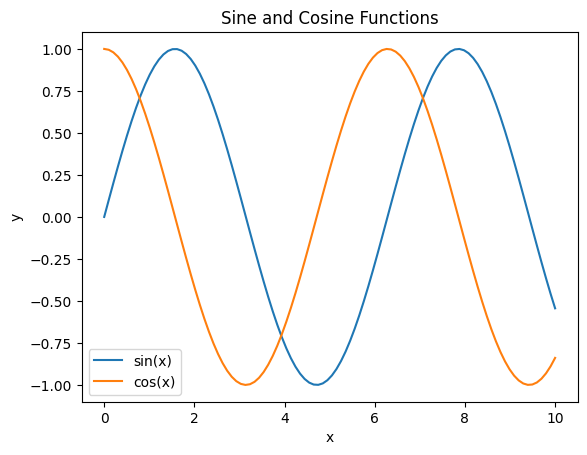

In [5]:
# Add axes labels, legend and title

# Define a label for the legend
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x),  label='cos(x)')

# This adds a title
plt.title('Sine and Cosine Functions')

# This adds labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# This adds the legend to the plot
plt.legend()

plt.show()

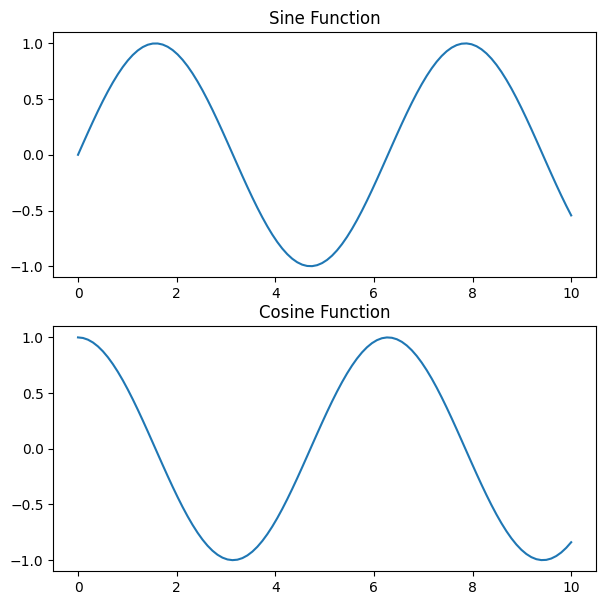

In [6]:
# Add subplots 

# Define the figure size
plt.figure(figsize=(7, 7))

# Create two subplots
# The first subplot is on the top 
plt.subplot(2, 1, 1) # 2 rows, 1 column, first subplot
plt.plot(x, np.sin(x), label='sin(x)')
plt.title('Sine Function')

# The second subplot is on the bottom 
plt.subplot(2, 1, 2) # 2 rows, 1 column, second subplot
plt.plot(x, np.cos(x), label='cos(x)')
plt.title('Cosine Function')

plt.show()

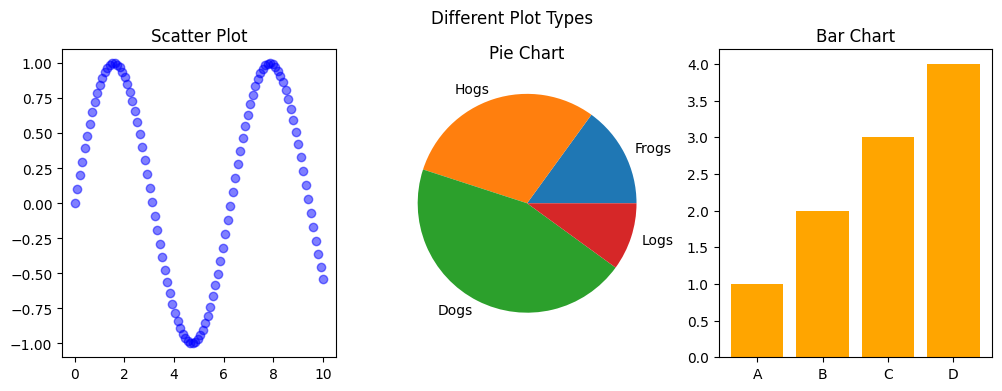

In [7]:
# There are many more plot types

plt.figure(figsize=(12, 4))

# For example, a scatter plot
plt.subplot(1, 3, 1)
plt.scatter(x, np.sin(x), label='sin(x)', color='blue', alpha=0.5)
plt.title('Scatter Plot')

# Or a pie chart
plt.subplot(1, 3, 2)
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
plt.pie(sizes,labels=labels)
plt.title('Pie Chart')

# Or a bar chart
plt.subplot(1, 3, 3)
labels = ['A', 'B', 'C', 'D']
values = [1, 2, 3, 4]
plt.bar(labels, values, color='orange')
plt.title('Bar Chart')

plt.suptitle('Different Plot Types')

plt.show()

### Exercise 01: Read data
In this exercise you should [read](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) data from the file system. For this use pandas.

In [8]:
# TODO: Read the IMDB dataset from the file
imdb_data = pd.read_csv(IMDB_FILE)

### Exercise 02: Sentiment Distribution
Visualize the number of positive vs. negative reviews
1. Create a [bar plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) to display the distribution of sentiment counts

**Hints**:
* Use the keys and values of the dictionary as `x` and `height` in the bar plot
* Use `plt.bar()` to create the bar plot
* Label your axes and title the plot


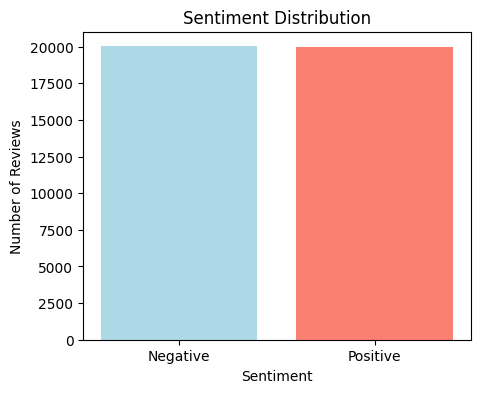

In [ ]:
# Get the counts of each label as a dictionary
counts_per_label = imdb_data['label'].value_counts().to_dict()

# TODO: Create a bar plot to visualize the distribution of the labels
plt.figure(figsize=(5, 4))
plt.bar(x=counts_per_label.keys(), height=counts_per_label.values(), color=['lightblue', 'salmon'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)

plt.show()

### Exercise 03: Review Length Distribution
Understand the length distribution of the reviews by visualization.
1. Compute the number of words for each review.
2. Create a histogram to visualize the distribution of review lengths.
3. Experiment with different bin sizes (e.g., 20, 50, 100).

**Hints**:
* Use `.str.split().apply(len)` to get the word count from the text-Series (`imdb_data['text']`)
* Use `plt.hist()` to plot the word count.


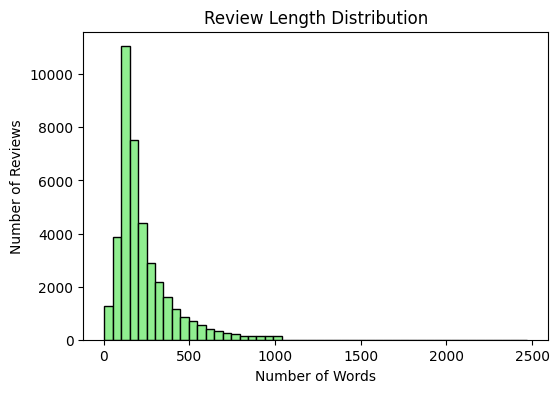

In [ ]:
# TODO: Create a histogram to visualize the distribution of review lengths
plt.figure(figsize=(6, 4))
review_lengths = imdb_data['text'].str.split().apply(len)
plt.hist(review_lengths, bins=50, color='lightgreen', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')

plt.show()

### Exercise 04: Word Cloud Visualization
Visualize the most common words in the **negative** reviews as a second subplot.
1. See how the wordcloud was created from the positive reviews
2. Do the same for negative reviews
3. Plot the wordcloud as a subplot next to the other wordcloud (horizontally aligned)

**Hints**:
* See [WordCloud](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) library for background knowledge


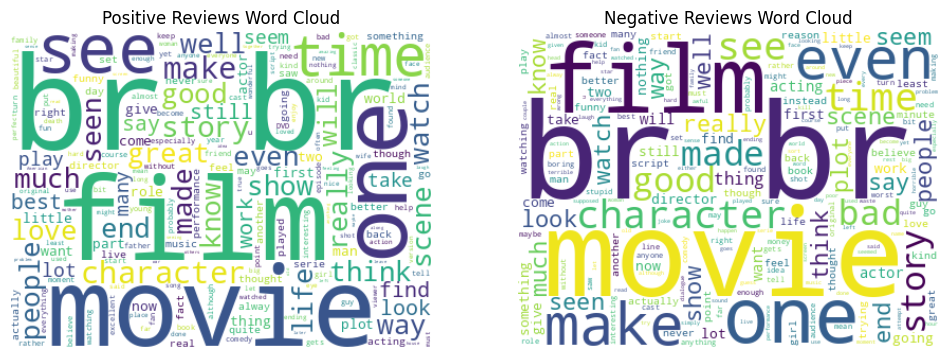

In [ ]:
# Separate the reviews
positive_reviews = imdb_data[imdb_data['label'] == 1]['text']

# Generate word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color='white').generate(' '.join(positive_reviews))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

# TODO: Create a second word cloud for negative reviews in the second subplot
negative_reviews = imdb_data[imdb_data['label'] == 0]['text']

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color='white').generate(' '.join(negative_reviews))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

### Exercise 05: Top Words Frequency Plot
See which words are most common in each sentiment.
1. Get the most common words and their count for the negative reviews
2. Create a horizontal bar plot for each sentiment, where the words are shown on the y axis and the count of words defines the width

**Hints**:
* Use `plt.subplot()` to create two subplots 
* Use `plt.barh()` for a horizontal bar plot.

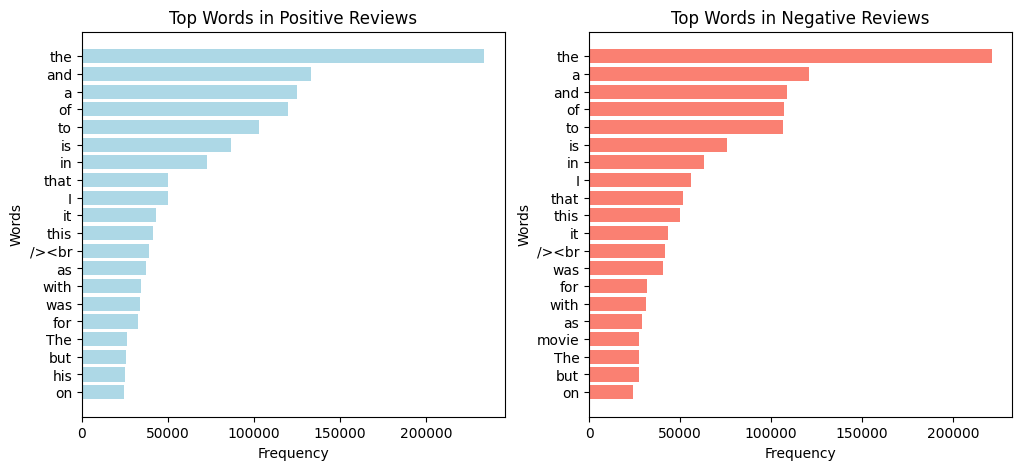

In [ ]:
# Define the number of words to display
amount_of_words = 20

# Tokenize and count word frequencies
positive_words = Counter(' '.join(positive_reviews).split())

# TODO: Tokenize and count word frequencies for negative reviews
negative_words = Counter(' '.join(negative_reviews).split())

# Get the most common words
pos_common = positive_words.most_common(amount_of_words)
neg_common = negative_words.most_common(amount_of_words)

# Get the words and their counts for positive reviews
positive_words = []
positive_counts = []
for word, count in pos_common:
    positive_words.append(word)
    positive_counts.append(count)

# TODO: Get the most common words and their counts for negative reviews
negative_words = []
negative_counts = []
for word, count in neg_common:
    negative_words.append(word)
    negative_counts.append(count)


# TODO: Create a bar plot for the most common words in positive and negative reviews
plt.figure(figsize=(12, 5))

# Solution
plt.subplot(1, 2, 1)
plt.barh(y=positive_words, width=positive_counts, color='lightblue')
plt.title('Top Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(y=negative_words, width=negative_counts, color='salmon')
plt.title('Top Words in Negative Reviews')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.show()

### Exercise 06: Sentiment Trends Over Time
Show the sentiment trends over the years.  
1. Create a line plot to show the mean trend.
2. Change the linestyle of the plot to `--`

**Hints**:
* Use `sentiment_trend.index` to get the list of years.
* Use `sentiment_trend.values` to get the mean sentiments

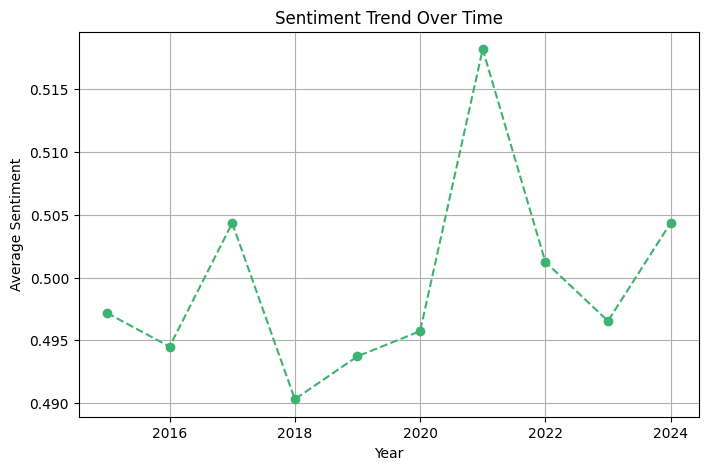

In [ ]:
# Get the sentiment trend over time
sentiment_trend = imdb_data.groupby('year')['label'].mean()

# TODO: Plot the sentiment trend over time using a line plot
plt.figure(figsize=(8, 5))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o', linestyle='--', color='mediumseagreen')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

### Exercise 07: Conclusion Data Understanding
Think about possible preprocessing mechanisms. What transformations should we apply to the data to enable better usage? Do you think, we need to clean the review texts?

Solution
* remove stopwords
* remove punctuation
* remove html tags
* transform all to same case (i.e. the most common words contains "The" and "the")
* maybe take length of reviews into account